In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
INPUT_DIM = 64
OUT_DIM = 10
H_DIM = 32

In [47]:
from sklearn import datasets

mnist = datasets.load_digits()
dataset = [(mnist.data[i][None, ...], mnist.target[i]) for i in range(len(mnist.target))]

In [69]:
# <0 зануляем
def relu(t):
    return np.maximum(t, 0)

# функция активации
def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

# <0 зануляем, >0 - единица
def relu_deriv(t):
    return (t >= 0).astype(float)

def normalization(t):
    ver = abs(sum(sum(t)))
    if ver > 1:
        return 1
    return ver

W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

loss_arr = []

for ep in range(200):
    random.shuffle(dataset)
    for i in range(len(dataset)):
        # изображение и ответ
        x, y = dataset[i]

        # движение вперед
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)
        # функция потерь
        #E = np.sum(sparse_cross_entropy(z, y))
        
        # движение назад
        
        # преобразование ответа в массив
        y_full = to_full(y, OUT_DIM)
        # находим ошибку
        dE_dt2 = z - y_full
        # корректировка второго слоя
        dE_dW2 = h1.T @ dE_dt2
        # суммарная ошибка
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        
        E = normalization(dE_dt1)
        
        # корректировка первого слоя
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # обновляем веса
        W1 = W1 - 0.0002 * dE_dW1
        b1 = b1 - 0.0002 * dE_db1
        W2 = W2 - 0.0002 * dE_dW2
        b2 = b2 - 0.0002 * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

calc_accuracy()

1.0

In [70]:
preprocessed_image = (np.asarray(Image.open('./123/1.bmp').convert("L"))/255)
input_vector = preprocessed_image.reshape(1, -1)
np.argmax(predict(input_vector))

0

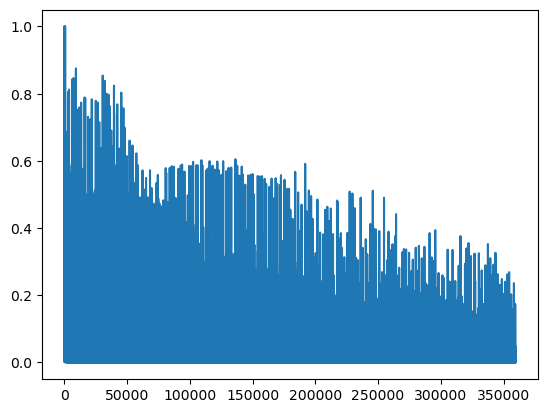

In [71]:
plt.plot(loss_arr)
plt.show()